# [**Utilisation de KBinsDiscretizer pour discrétiser des caractéristiques continues**](https://nbviewer.org/github/Franck-PepperLabs/pepper_data-science_practising/blob/main/Sklearn/examples/6_3_preprocessing/plot_discretization.ipynb)<br/>([_Using KBinsDiscretizer to discretize continuous features_](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_discretization.html))

L'exemple compare les résultats de prédiction de la régression linéaire (modèle linéaire) et de l'arbre de décision (modèle basé sur les arbres) avec et sans discrétisation des caractéristiques à valeurs réelles.

Comme le montre le résultat avant la discrétisation, le modèle linéaire est rapide à construire et relativement simple à interpréter, mais il ne peut modéliser que des relations linéaires, tandis que l'arbre de décision peut construire un modèle beaucoup plus complexe des données. Une façon de rendre le modèle linéaire plus puissant sur des données continues est d'utiliser la discrétisation (également appelée binning). Dans l'exemple, nous discrétisons la caractéristique et encodons les données transformées en "one-hot". Notez que si les intervalles ne sont pas suffisamment larges, il y aurait un risque nettement accru de surajustement, il est donc généralement recommandé de régler les paramètres du discrétiseur en utilisant une validation croisée.

Après la discrétisation, la régression linéaire et l'arbre de décision font exactement la même prédiction. Comme les caractéristiques sont constantes à l'intérieur de chaque intervalle, tout modèle doit prédire la même valeur pour tous les points à l'intérieur d'un intervalle. Comparé au résultat avant la discrétisation, le modèle linéaire devient beaucoup plus flexible tandis que l'arbre de décision devient beaucoup moins flexible. Notez que la discrétisation des caractéristiques n'a généralement aucun effet bénéfique pour les modèles basés sur les arbres, car ces modèles peuvent apprendre à diviser les données n'importe où.

![](https://scikit-learn.org/stable/_images/sphx_glr_plot_discretization_001.png)

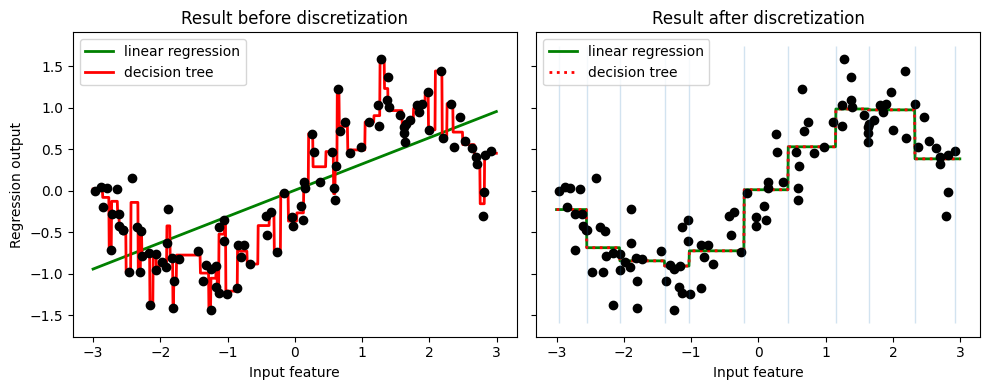

In [1]:
# Author: Andreas Müller
#         Hanmin Qin <qinhanmin2005@sina.com>
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.tree import DecisionTreeRegressor

# construct the dataset
rnd = np.random.RandomState(42)
X = rnd.uniform(-3, 3, size=100)
y = np.sin(X) + rnd.normal(size=len(X)) / 3
X = X.reshape(-1, 1)

# transform the dataset with KBinsDiscretizer
enc = KBinsDiscretizer(n_bins=10, encode="onehot")
X_binned = enc.fit_transform(X)

# predict with original dataset
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(10, 4))
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)
reg = LinearRegression().fit(X, y)
ax1.plot(line, reg.predict(line), linewidth=2, color="green", label="linear regression")
reg = DecisionTreeRegressor(min_samples_split=3, random_state=0).fit(X, y)
ax1.plot(line, reg.predict(line), linewidth=2, color="red", label="decision tree")
ax1.plot(X[:, 0], y, "o", c="k")
ax1.legend(loc="best")
ax1.set_ylabel("Regression output")
ax1.set_xlabel("Input feature")
ax1.set_title("Result before discretization")

# predict with transformed dataset
line_binned = enc.transform(line)
reg = LinearRegression().fit(X_binned, y)
ax2.plot(
    line,
    reg.predict(line_binned),
    linewidth=2,
    color="green",
    linestyle="-",
    label="linear regression",
)
reg = DecisionTreeRegressor(min_samples_split=3, random_state=0).fit(X_binned, y)
ax2.plot(
    line,
    reg.predict(line_binned),
    linewidth=2,
    color="red",
    linestyle=":",
    label="decision tree",
)
ax2.plot(X[:, 0], y, "o", c="k")
ax2.vlines(enc.bin_edges_[0], *plt.gca().get_ylim(), linewidth=1, alpha=0.2)
ax2.legend(loc="best")
ax2.set_xlabel("Input feature")
ax2.set_title("Result after discretization")

plt.tight_layout()
plt.show()